<a href="https://colab.research.google.com/github/YaninaLu/data_science_hw7/blob/main/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_score, recall_score, roc_auc_score

In [ ]:
# load the data
wine_dataset = load_wine(as_frame=True)

In [ ]:
# look at features
wine_dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# look at targets
print(wine_dataset.target_names)

class_0 = len(wine_dataset.frame[wine_dataset['target']==0])
print(f'Number of class 0: {class_0}')

class_1 = len(wine_dataset.frame[wine_dataset['target']==1])
print(f'Number of class 1: {class_1}')

class_2 = len(wine_dataset.frame[wine_dataset['target']==2])
print(f'Number of class 3: {class_2}')

['class_0' 'class_1' 'class_2']
Number of class 0: 59
Number of class 1: 71
Number of class 3: 48


We have 3 classes as targets, so we are dealing with a multiclass classification problem. So, I will use a softmax function.

The dataset is not super-imbalanced, though the number of classes differs.

In [ ]:
# look at basic statistics 
wine_dataset.frame.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


The scale of data variance differs a lot between features, thus the data has to be normalized beforehand to prevent overflow error and make gradient descent converge faster.

In [ ]:
# extract features and target data
X = wine_dataset.frame.drop(['target'], axis=1)
y = wine_dataset['target']

# divide dataset into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True)

In [ ]:
# make a pipeline
pipeline = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(multi_class='multinomial'))])

# train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(multi_class='multinomial'))])

In [ ]:
# test in on validation set
val_predictions = pipeline.predict(X_val)
val_predictions_proba = pipeline.predict_proba(X_val)

# check accuracy
accuracy = accuracy_score(y_val, val_predictions, normalize=False)
print(f'The number of correctly classified labels is: {accuracy}, and the total number of samples is {y_val.shape[0]}')

# check the mean loss per sample
loss = log_loss(y_val, val_predictions_proba, labels=[0, 1, 2])
print(f'The mean loss per sample is {loss}')

# check the precision for each class
precision_scores = precision_score(y_val, val_predictions, average=None)
print(f'Precision for each class: {precision_scores}')

# check the recall for each class
recall_scores = recall_score(y_val, val_predictions, average=None)
print(f'Recall for each class: {recall_scores}')

# check area under roc curve
roc_score = roc_auc_score(y_val, val_predictions_proba, average='weighted', multi_class='ovo')
print(f'ROC score: {roc_score}')

The number of correctly classified labels is: 45, and the total number of samples is 45
The mean loss per sample is 0.0794693303225805
Precision for each class: [1. 1. 1.]
Recall for each class: [1. 1. 1.]
ROC score: 1.0


The accuracy of the model is good. No samples were misclassified.

Mean loss is low too, which is good.

Precisions are close to one, which is almost perfect. The same goes for recall rates.

ROC score is pretty good, which means that the model distinguishes the classes well.

In [ ]:
# divide the dataset into a custom proportion
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, shuffle=True, test_size=0.4)

# train the new model
pipeline.fit(X_train2, y_train2)

# test in on validation set
val_predictions2 = pipeline.predict(X_val2)
val_predictions_proba2 = pipeline.predict_proba(X_val2)

# check accuracy
accuracy = accuracy_score(y_val2, val_predictions2, normalize=False)
print(f'The number of correctly classified labels is: {accuracy}, and the total number of samples is {y_val2.shape[0]}')

# check the mean loss per sample
loss = log_loss(y_val2, val_predictions_proba2, labels=[0, 1, 2])
print(f'The mean loss per sample is {loss}')

# check the precision for each class
precision_scores = precision_score(y_val2, val_predictions2, average=None)
print(f'Precision for each class: {precision_scores}')

# check the recall for each class
recall_scores = recall_score(y_val2, val_predictions2, average=None)
print(f'Recall for each class: {recall_scores}')

# check area under roc curve
roc_score = roc_auc_score(y_val2, val_predictions_proba2, average='weighted', multi_class='ovo')
print(f'ROC score: {roc_score}')

The number of correctly classified labels is: 71, and the total number of samples is 72
The mean loss per sample is 0.09298518030302466
Precision for each class: [1.         0.96551724 1.        ]
Recall for each class: [1.         1.         0.95238095]
ROC score: 0.9991319444444446


The results are just a bit worse.

# Task 2

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, log_loss, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# load the data
data = load_iris(as_frame=True)

# explore features and targets
print(data.feature_names)
print(data.target.unique())

# look at the stats
display(data.frame.describe())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 1 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The features do not vary greatly, so we can go without normalization.

We have three separate classes, so again it is a good idea to use softmax to count probabilities.

In [ ]:
# form the input and label sets
X = data.frame.drop(['target'], axis=1)
y = data['target']

# split the data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

# define multinomial classifier
classifier = LogisticRegression(multi_class='multinomial', max_iter=200)

# define metrics 
metrics = {
    'accuracy': make_scorer(accuracy_score, normalize=False), 
    'neg_log_loss': make_scorer(log_loss, needs_proba=True),
    'precision': make_scorer(precision_score, average='macro'), 
    'recall': make_scorer(recall_score, average='macro'), 
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True, average='weighted', multi_class='ovo')}

# cross-validate the model
cv_results = cross_validate(classifier, X_train, y_train, scoring=metrics, return_train_score=True)
print(f'Total number of samples: {X_train.shape}')
print('-------------------')

# display the metrics
for metric, score in scores.items():
  print(f"{metric}: {score}")
  print('-------------------')

Total number of samples: (112, 4)
-------------------
fit_time: [0.03570819 0.03651237 0.03272724 0.03328466 0.02807474]
-------------------
score_time: [0.02152777 0.02195334 0.02052879 0.0203433  0.02008677]
-------------------
test_accuracy: [23 21 22 21 21]
-------------------
train_accuracy: [87 88 89 89 90]
-------------------
test_neg_log_loss: [0.13534327 0.20999411 0.09566937 0.18981664 0.19978757]
-------------------
train_neg_log_loss: [0.15505542 0.14305149 0.16598618 0.13887249 0.1363432 ]
-------------------
test_precision: [1.         0.92592593 1.         0.95833333 0.95833333]
-------------------
train_precision: [0.97916667 0.98924731 0.98924731 0.98958333 1.        ]
-------------------
test_recall: [1.         0.91666667 1.         0.95833333 0.95833333]
-------------------
train_recall: [0.97777778 0.98924731 0.98924731 0.98888889 1.        ]
-------------------
test_roc_auc: [1.         1.         1.         0.99391234 0.99391234]
-------------------
train_roc_auc

We see that the model performs pretty well on different folds of data without tuning any hyperparameters.

In [ ]:
# fit the model
classifier.fit(X_train, y_train)

# test the model on the test set
test_pred = classifier.predict(X_test)
test_pred_proba = classifier.predict_proba(X_test)

# look at the metrics
accuracy = accuracy_score(y_test, test_pred, normalize=False)
print(f'The number of correctly classified labels is: {accuracy}, and the total number of samples is {y_test.shape[0]}')

loss = log_loss(y_test, test_pred_proba)
print(f'The mean loss per sample is {loss}')

precision_scores = precision_score(y_test, test_pred, average=None)
print(f'Precision for each class: {precision_scores}')

recall_scores = recall_score(y_test, test_pred, average=None)
print(f'Recall for each class: {recall_scores}')

roc_score = roc_auc_score(y_test, test_pred_proba, average='weighted', multi_class='ovo')
print(f'ROC score: {roc_score}')

The number of correctly classified labels is: 35, and the total number of samples is 38
The mean loss per sample is 0.18183351862235034
Precision for each class: [1.   0.75 1.  ]
Recall for each class: [1.         1.         0.83333333]
ROC score: 1.0


# Task 3

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data
X, y = load_diabetes(as_frame=True, return_X_y=True)
display(X)
display(y)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
# divide into train and val sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# fit the linear model
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Coeff of determination for this model on the training set: {model.score(X_train, y_train)}')

Coeff of determination for this model on the training set: 0.529628716629384


MSE: 3179.7305492158916
R2 score: 0.4617837557937693


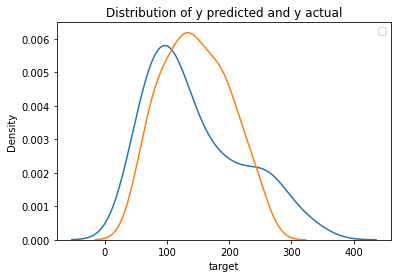

<Axes: xlabel='target'>

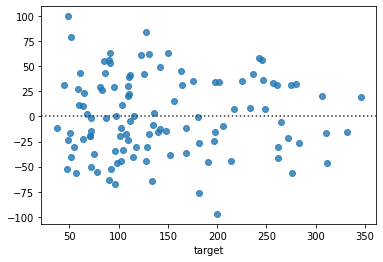

In [ ]:
# check model's performance of validation set
val_pred = model.predict(X_test)

# check MSE
mse = mean_squared_error(y_test, val_pred)
print(f"MSE: {mse}")

# check coeff of determination
r2 = r2_score(y_test, val_pred)
print(f"R2 score: {r2}")

plt.title("Distribution of y predicted and y actual")
ax1=sns.kdeplot(y_test)
sns.kdeplot(val_pred, ax=ax1)
plt.legend()
plt.show()

sns.residplot(x=y_test, y=val_pred)

Coeff of determination for this model on the training set: 0.5494600346652949
MSE: 3490.5419489351398
R2 score: 0.43452814314167665


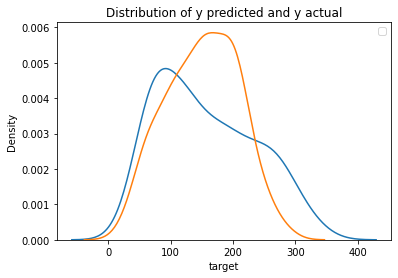

<Axes: xlabel='target'>

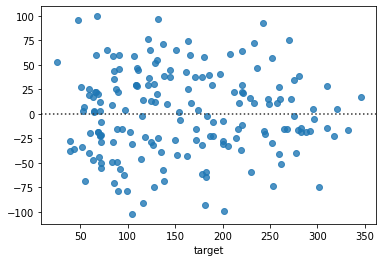

In [ ]:
# divide into train and val set with my proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# fit the linear model
model = LinearRegression()
model.fit(X_train, y_train)
print(f'Coeff of determination for this model on the training set: {model.score(X_train, y_train)}')

# check model's performance of validation set
val_pred = model.predict(X_test)

# check MSE
mse = mean_squared_error(y_test, val_pred)
print(f"MSE: {mse}")

# check coeff of determination
r2 = r2_score(y_test, val_pred)
print(f"R2 score: {r2}")

plt.title("Distribution of y predicted and y actual")
ax1=sns.kdeplot(y_test)
sns.kdeplot(val_pred, ax=ax1)
plt.legend()
plt.show()

sns.residplot(x=y_test, y=val_pred)

We can see that when the training set is bigger, the model performs better on the validation set and a bit worse of the training set. And the MSE is generally smaller.